# Optimization (Scenario 1, 2 & 3)

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import datetime
import os
import platform

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.0
swolfpy_processmodels,0.1.4
swolfpy_inputdata,0.1.9


### System info

In [3]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.18362-SP0
Processor,"Intel64 Family 6 Model 158 Stepping 9, Genuine..."
CPU_count,8


## Setup

In [4]:
iter_mehtod = 'LHS' 
n_iter = 100
n_proc = os.cpu_count()

summary = f"""
********  Config *********
Time: {datetime.datetime.now().strftime("%Y-%m-%d & %H:%M:%S")}
Initial guess generation: {iter_mehtod}
N iter: {n_iter}
N proc: {n_proc}\n
"""
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()

## Create project

In [5]:
project_name = 'Optimization'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [6]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [7]:
# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,Collection
LF,NaN,30.0,30.0,30.0,30.0,30.0,30.0
Composting,NaN,NaN,30.0,30.0,30.0,30.0,30.0
AD,NaN,NaN,NaN,30.0,30.0,30.0,30.0
WTE,NaN,NaN,NaN,NaN,30.0,30.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,30.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Collection_processes:
# Only include one single family sector wih residual waste collection
Collection_scheme = sppm.SF_Col.scheme()
Collection_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
Collection_scheme[('RWC', 'N/A', 'N/A')] = 0.5

Collection_processes = {}
Collection_processes['Collection'] = {'input_type': [],
                                      'model': sppm.SF_Col('Collection', Collection_scheme,
                                                      Treatment_processes=Treatment_processes,
                                                      Distance=distance)}

In [9]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:12


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:25
  Finished: 06/30/2021 19:48:38
  Total time elapsed: 00:00:12
  CPU %: 37.90
  Memory %: 1.32


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 208.30
  Memory %: 1.33

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.33

              ####
              ++++++ Initializing the AD
              

Writing activities to SQLite3 database:


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.33

              ####
              ++++++ Initializing the WTE
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 146.50
  Memory %: 1.33

              ####
              ++++++ Initializing the SS_MRF
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.33

              ####
              ++++++ Initializing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.33

              ####
              ++++++ Initializing the Collection
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:39
  Total time elapsed: 00:00:00
  CPU %: 151.20
  Memory %: 1.33


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:39
  Finished: 06/30/2021 19:48:40
  Total time elapsed: 00:00:01
  CPU %: 40.90
  Memory %: 1.34

                  ####
                  ++++++ Writing the Composting_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:41
  Finished: 06/30/2021 19:48:41
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.35

              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:41
  Finished: 06/30/2021 19:48:41
  Total time elapsed: 00:00:00
  CPU %: 68.80
  Memory %: 1.35

                  ####
                  ++++++ Writing the AD_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:41
  Finished: 06/30/2021 19:48:41
  Total time elapsed: 00:00:00
  CPU %: 50.40
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:41
  Finished: 06/30/2021 19:48:42
  Total time elapsed: 00:00:00
  CPU %: 40.00
  Memory %: 1.36

                  ####
                  ++++++ Writing the WTE_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:42
  Finished: 06/30/2021 19:48:42
  Total time elapsed: 00:00:00
  CPU %: 126.00
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the WTE
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:43
  Finished: 06/30/2021 19:48:43
  Total time elapsed: 00:00:00
  CPU %: 52.10
  Memory %: 1.37

                  ####
                  ++++++ Writing the SS_MRF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:43
  Finished: 06/30/2021 19:48:43
  Total time elapsed: 00:00:00
  CPU %: 66.80
  Memory %: 1.38


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:44
  Finished: 06/30/2021 19:48:44
  Total time elapsed: 00:00:00
  CPU %: 54.50
  Memory %: 1.39

              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:44
  Finished: 06/30/2021 19:48:44
  Total time elapsed: 00:00:00
  CPU %: 75.60
  Memory %: 1.39

                  ####
                  ++++++ Writing the Collection_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:45
  Finished: 06/30/2021 19:48:45
  Total time elapsed: 00:00:00
  CPU %: 49.80
  Memory %: 1.39


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/30/2021 19:48:46
  Finished: 06/30/2021 19:48:46
  Total time elapsed: 00:00:00
  CPU %: 86.00
  Memory %: 1.40

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database AD
                  

                  Grouping the exchanges with parameters in Database WTE
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database Collection
                  
Time for writing the project: 75 second


In [10]:
start = time()
demo.update_parameters(demo.parameters.default_parameters_list())
print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 10 second


In [11]:
input_dict = {'Collection':{}}

for key in common_data.Index:
    input_dict['Collection'][key]=1
demo.process_start_scenario(input_dict,'Collection')

## Mass flows, impacts and costs based on default parameters

In [12]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion','GWP','Operation Cost','Capital cost','Total cost',
                              'Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing'])

bw2.projects.set_current('Optimization')
Demand = {('waste', 'Collection'):1}
FU=bw2.get_activity(('waste', 'Collection'))
method = ('IPCC 2013', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

for process in ['Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
results

,Value,Unit
Diversion,51.14,%
GWP,-366.92,kg CO2/Mg
Operation Cost,43.69,$/Mg
Capital cost,18.8,$/Mg
Total cost,62.49,$/Mg
Collection,74621,Mg/yr
LF,36462,Mg/yr
WTE,31057,Mg/yr
Composting,4785,Mg/yr
AD,0,Mg/yr


In [13]:
demo.parameters_list

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.5}]

In [14]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_optimization')

# Optimization: Scenario 1

In [15]:
Opt=sp.Optimization(Demand, [('IPCC 2013', 'climate change', 'GWP 100a')], demo)

In [16]:
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [17]:
start = time()
sp.Optimization.multi_start_optimization(Opt, collection=True,  n_iter=n_iter, timeout=1000,
                                         nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_1 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -42844852.5952055
                      Global min: -42844852.5952055 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -42844852.595200874
                      Global min: -42844852.5952055 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -42844852.59520281
                      Global min: -42844852.5952055 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -42844852.59519719
                      Global min: -42844852.59520

Time for Optimization: 596 second


### Performance of iterations

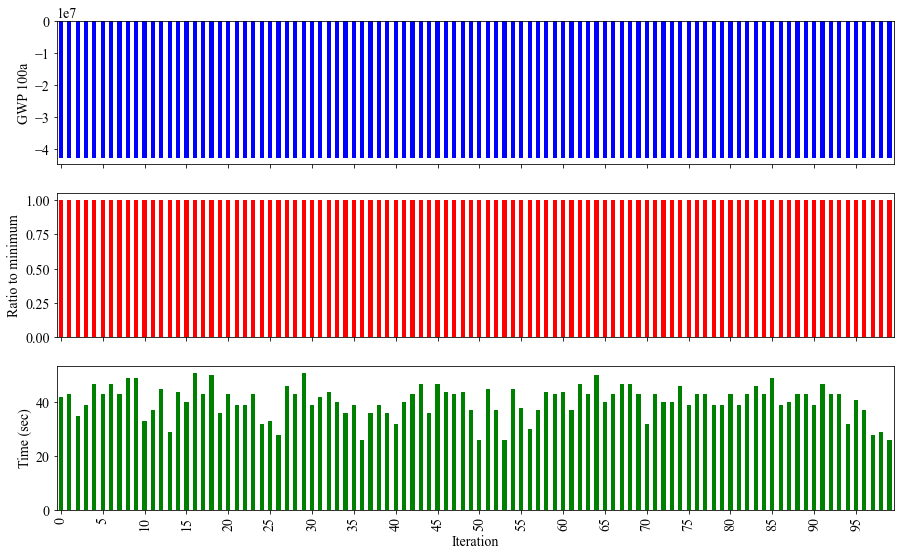

In [18]:
def Iterations_Performance(OptObject, FileName):
    objectives = []
    times = []
    for res in OptObject.all_results:
        if res:
            if res.success:
                objectives.append(res.fun * 10**OptObject.magnitude)
                times.append(res.time)
            else:
                objectives.append(None)
                times.append(res.time)
        else:
            objectives.append(None)
            times.append(None)

    DF = pd.DataFrame({'Objective': objectives, 'Time': times})
    DF['Ratio'] = DF['Objective'].fillna(0)/DF['Objective'].fillna(0).min()
    DF.to_csv(FileName)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15,9), sharex=True)

    DF['Objective'].plot(kind='bar', ax=ax1, color='b')
    ax1.set_ylabel(Opt.method[0][-1])

    DF['Ratio'].plot(kind='bar', ax=ax2, color='r')
    ax2.set_ylabel('Ratio to minimum')

    DF['Time'].plot(kind='bar', ax=ax3, color='g')
    ax3.set_ylabel("Time (sec)")
    ax3.set_xlabel('Iteration')
    
    if len(list(DF.index)) > 20:
        ax3.set_xticks(list(DF.index[::5]))
        ax3.set_xticklabels(list(DF.index)[::5])
    
    return DF
    
DF = Iterations_Performance(Opt, 'Iterations_Scenario1.csv')

## Mass flows, impacts and costs

In [19]:
def report_res(Opt, FU, fileName):
    results = pd.DataFrame(columns=['Value', 'Unit'],
                           index=['Diversion','GWP','Operation Cost','Capital cost','Total cost',
                                  'Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing'])

    Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
    Opt.lcia()
    results.loc['GWP',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

    Opt.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Operation Cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


    Opt.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Capital cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Total cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    for process in ['Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing']:
        results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(Opt, process)), 'Mg/yr']

    results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
    results.to_csv(fileName)
    return(results)

In [20]:
report_res(Opt, FU, 'OptimizeScenario1.csv')

,Value,Unit
Diversion,87.32,%
GWP,-574.17,kg CO2/Mg
Operation Cost,15.57,$/Mg
Capital cost,35.28,$/Mg
Total cost,50.86,$/Mg
Collection,74621,Mg/yr
LF,9460,Mg/yr
WTE,58759,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [21]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario1.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 0.0, 2443.883, 0.0, 56315.39, 0.0, 0.0, 0.0, 0.0, 8163.659, 1296.078, 346.744, 1600.576, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 115.572, 260.038, 0.0, 393.

In [22]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5417},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.4583},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.1724},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.8276},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5047},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.4953},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.6846},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.3154},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 

In [23]:
summary = f"""\n
********  Scenario 1 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 1 - Summary *********
Number of decision variables: 18
Number of constraints: 7
Total time: 0:09:56
Average time per iteration: 0:00:40
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




# Optimization: Scenario 2

In [24]:
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [25]:
constraints = {}
constraints['WTE'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}

In [26]:
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1000, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_2 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -30430027.791112274
                      Global min: -30430027.791112274 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -29979201.084483657
                      Global min: -30430027.791112274 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -30430027.791108098
                      Global min: -30430027.791112274 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -14579098.687207934
                      Global min: -3043

Time for Optimization: 934 second


### Performance of iterations

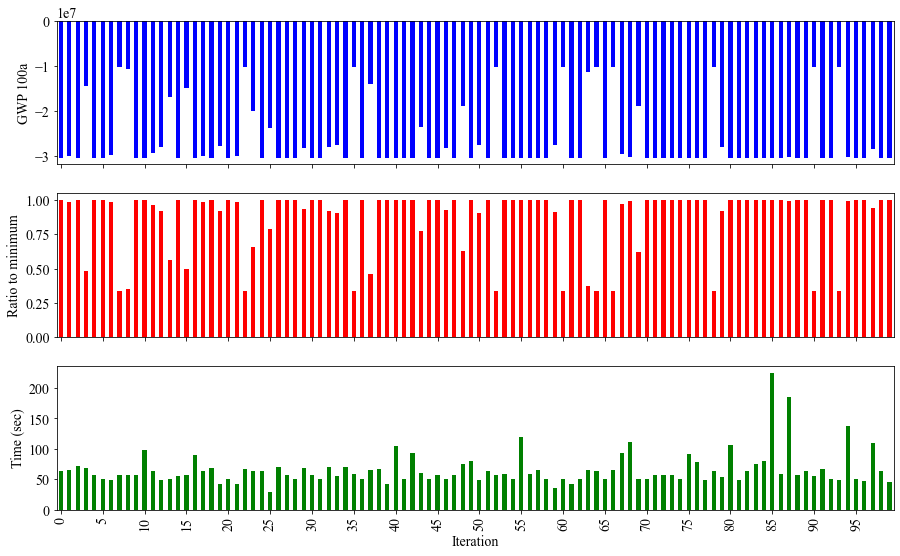

In [27]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario2.csv')

## Mass flows, impacts and costs

In [28]:
report_res(Opt, FU, 'OptimizeScenario2.csv')

,Value,Unit
Diversion,21.26,%
GWP,-407.8,kg CO2/Mg
Operation Cost,34.33,$/Mg
Capital cost,2.43,$/Mg
Total cost,36.75,$/Mg
Collection,74621,Mg/yr
LF,58759,Mg/yr
WTE,0,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [29]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario2.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 2443.883, 0.0, 56315.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 115.572, 260.038, 0.0, 393.997, 146.256, 146

In [30]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.4431},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5569},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.617},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.383},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.3793},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.6207},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.6457},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.3543},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 'S

In [31]:
summary = f"""\n
********  Scenario 2 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 2 - Summary *********
Number of decision variables: 18
Number of constraints: 8
Total time: 0:15:34
Average time per iteration: 0:01:06
Successful iterations: 100
Number of best iterations: 63
Number of >95 iterations: 69




# Optimization: Scenario 3

In [32]:
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [33]:
constraints = {}
constraints['WTE'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}
constraints['LF'] = {'limit':44772, 'KeyType':'Process','ConstType':"<="}

In [34]:
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, timeout=1000, nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_3 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -26030361.021939762
                      Global min: -26030361.021939762 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -27406947.528744914
                      Global min: -27406947.528744914 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -26519994.984235805
                      Global min: -27406947.528744914 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -26501895.90004223
                      Global min: -27406

Time for Optimization: 1228 second


### Performance of iterations

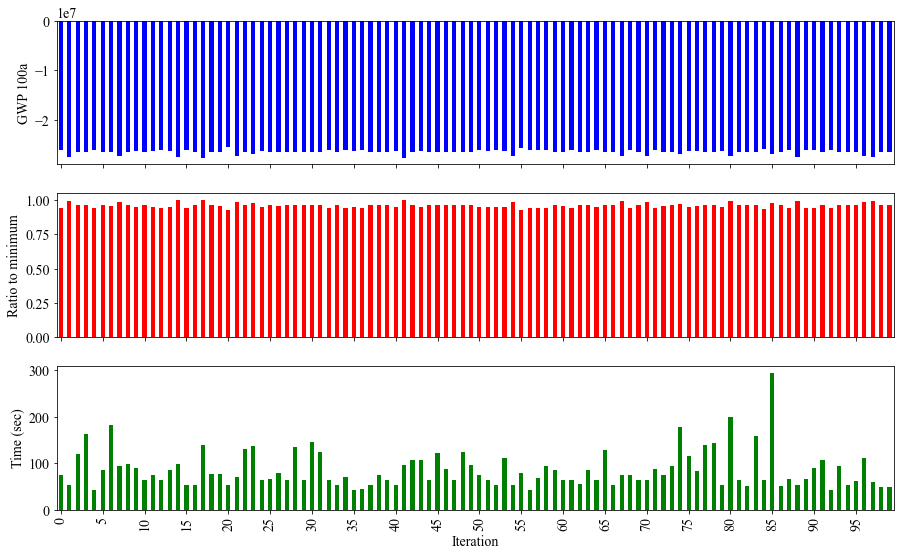

In [35]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario3.csv')

## Mass flows, impacts and costs

In [36]:
report_res(Opt, FU, 'OptimizeScenario3.csv')

,Value,Unit
Diversion,40.0,%
GWP,-369.56,kg CO2/Mg
Operation Cost,54.67,$/Mg
Capital cost,11.81,$/Mg
Total cost,66.49,$/Mg
Collection,74621,Mg/yr
LF,44771,Mg/yr
WTE,0,Mg/yr
Composting,0,Mg/yr
AD,14875,Mg/yr


In [37]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario3.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 886.663, 0.0, 2443.883, 0.0, 41440.718, 0.0, 0.0, 14874.672, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 115.572, 260.038, 0.0, 393.997, 1

In [38]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.1422},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.8578},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 1.0},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.7337},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.2663},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 0.1039},
 {'name': ('Collection', ('RWC', 'SSYW', '

In [39]:
summary = f"""\n
********  Scenario 3 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 3 - Summary *********
Number of decision variables: 18
Number of constraints: 9
Total time: 0:20:28
Average time per iteration: 0:01:26
Successful iterations: 100
Number of best iterations: 8
Number of >95 iterations: 73


